In [16]:
#source: https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_modeling.html
#e https://arch.readthedocs.io/en/latest/univariate/forecasting.html
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\vinic\\Desktop\\R\\timeseries_models\\datasets\\AirPassengers.csv', parse_dates = ['Month'], 
                 index_col = ['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
passengers = np.log(df)
#fig =  ann_inflation.plot()

In [21]:
passengers = passengers.diff().drop(passengers.index[0])

In [22]:
passengers

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484
...,...
1960-08-01,-0.026060
1960-09-01,-0.176399
1960-10-01,-0.097083


In [40]:
from arch.univariate import ARX
arx = ARX(100 * passengers, lags=[1,3,12])
res = arx.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     AR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:            #Passengers   R-squared:                       0.826
Mean Model:                        AR   Adj. R-squared:                  0.822
Vol Model:          Constant Variance   Log-Likelihood:               -382.325
Distribution:                  Normal   AIC:                           774.650
Method:            Maximum Likelihood   BIC:                           789.026
                                        No. Observations:                  131
Date:                Sun, Jan 03 2021   Df Residuals:                      126
Time:                        16:04:56   Df Model:                            5
                                    Mean Model                                    
==================================================================================
                      coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------------------------------------------------------
Const               0.1392      0.369      0.377      0.706      [ -0.584,  0.863]
#Pas...ers[1]  -1.2248e-03  3.190e-02 -3.840e-02      0.969 [-6.374e-02,6.129e-02]
#Pas...ers[3]      -0.0246  4.080e-02     -0.602      0.547    [ -0.105,5.539e-02]
#Pas...ers[12]      0.9167  4.223e-02     21.705 1.851e-104      [  0.834,  0.999]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
sigma2        20.0684      2.977      6.741  1.573e-11 [ 14.233, 25.903]
========================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

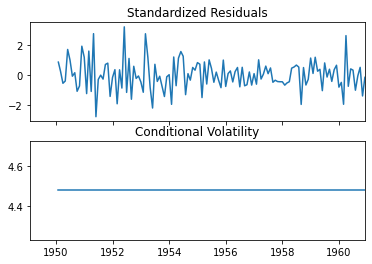

In [41]:
res.plot();

In [45]:
f = res.forecast()

In [47]:
f.mean

,h.1
Month,
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
...,...
1960-08-01,NaN
1960-09-01,NaN
1960-10-01,NaN


In [54]:
split_date = dt.datetime(1950,8,1)
res = arx.fit(last_obs=split_date, disp='off')

In [71]:
res

                     AR - Constant Variance Model Results                     
Dep. Variable:            #Passengers   R-squared:                       0.976
Mean Model:                        AR   Adj. R-squared:                  0.939
Vol Model:          Constant Variance   Log-Likelihood:               -10.7216
Distribution:                  Normal   AIC:                           31.4431
Method:            Maximum Likelihood   BIC:                           30.4019
                                        No. Observations:                    6
Date:                Sun, Jan 03 2021   Df Residuals:                        1
Time:                        16:12:33   Df Model:                            5
                                   Mean Model                                  
                     coef    std err          t      P>|t|     95.0% Conf. Int.
-------------------------------------------------------------------------------
Const              0.9985      0.417      2.396  

In [49]:
import datetime as dt

<AxesSubplot:xlabel='Month'>

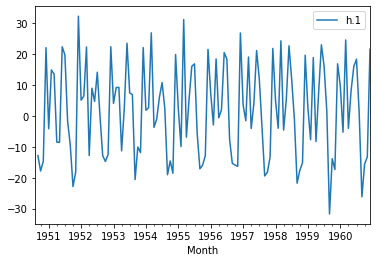

In [69]:
forecasts = res.forecast(start=split_date, align='target') #TARGET DÁ PARA O DIA
                                                            #ORIGIN DÁ PRA +1,...,+5 DIAS
                                                            #não faz sentido usr o horizon=5 se 
                                                            #usar target

#o que for predito
forecasts.mean[split_date:].plot()

<AxesSubplot:xlabel='Month'>

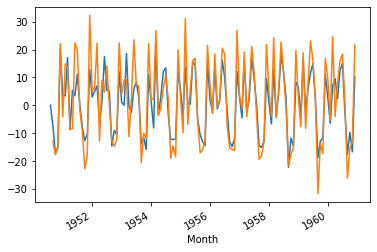

In [70]:
plt.plot(100 * passengers[split_date:])
forecasts.mean[split_date:]['h.1'].plot()

In [73]:
#para voltar do log return

np.random.seed(0)

s = pd.Series(np.random.random(10))
s

0    0.548814
1    0.715189
2    0.602763
3    0.544883
4    0.423655
5    0.645894
6    0.437587
7    0.891773
8    0.963663
9    0.383442
dtype: float64

In [75]:
t = np.log(s).diff()
t

0         NaN
1    0.264789
2   -0.171023
3   -0.100953
4   -0.251652
5    0.421717
6   -0.389360
7    0.711936
8    0.077530
9   -0.921554
dtype: float64

In [77]:
t.iat[0] = np.log(s.iat[0])
t

0   -0.599997
1    0.264789
2   -0.171023
3   -0.100953
4   -0.251652
5    0.421717
6   -0.389360
7    0.711936
8    0.077530
9   -0.921554
dtype: float64

In [78]:
final = np.exp(t.cumsum())

In [79]:
final

0    0.548814
1    0.715189
2    0.602763
3    0.544883
4    0.423655
5    0.645894
6    0.437587
7    0.891773
8    0.963663
9    0.383442
dtype: float64